In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Input,BatchNormalization,Dropout,LSTM
from keras.models import Sequential,Model
from keras import callbacks
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score


In [2]:
df=pd.read_csv('C:/Users/user/Desktop/MathsAI/Jupyter/Datasets/heart_failure_clinical_records_dataset.csv')

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<AxesSubplot:>

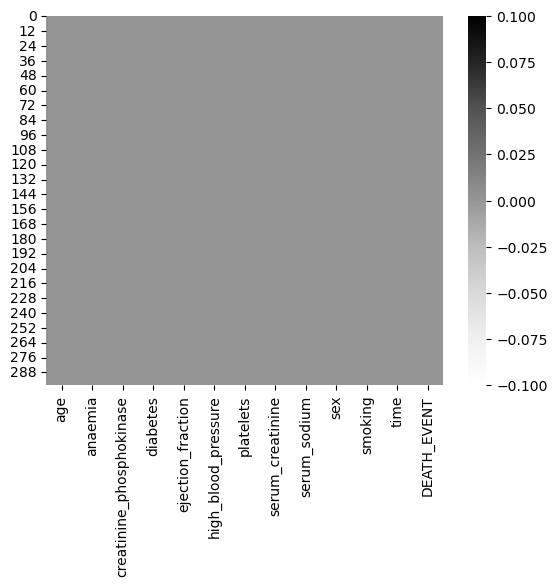

In [6]:
sns.heatmap(df.isna(),cmap='Greys')

In [7]:
df.shape

(299, 13)

In [8]:
# Assigning X and Y values
# X--- Features
# Y--- DEATH_EVENT

x=df.drop('DEATH_EVENT',axis=1)
y=df['DEATH_EVENT']


In [9]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [10]:
# Preprocessing Data

col_names=list(x.columns)
s_scaler=preprocessing.StandardScaler()
x=s_scaler.fit_transform(x)


In [11]:
# Split data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [12]:
# # Pipeline

# pipeline = make_pipeline(StandardScaler(),
# RandomForestClassifier(n_estimators=10, max_features=5, max_depth=2, random_state=1))

# # Fit the Pipeline estimator

# pipeline.fit(X_train, y_train)

In [13]:
x_train.shape

(239, 12)

In [14]:
y_train.shape

(239,)

In [15]:
# Model

model=Sequential()

model.add(Dense(4,activation='relu',kernel_initializer='uniform',input_dim=12))
model.add(Dense(16,activation='relu',kernel_initializer='uniform'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu',kernel_initializer='uniform'))
model.add(Dropout(0.4))
model.add(Dense(8,activation='relu',kernel_initializer='uniform'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='uniform'))

# Model Compile
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
    


In [16]:
# Model Training
hist=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=20,epochs=70)

Epoch 1/70
12/12 [==============================] - 2s 39ms/step - loss: 0.6922 - acc: 0.6485 - val_loss: 0.6909 - val_acc: 0.6833
Epoch 2/70
12/12 [==============================] - 0s 7ms/step - loss: 0.6899 - acc: 0.6778 - val_loss: 0.6887 - val_acc: 0.6833
Epoch 3/70
12/12 [==============================] - 0s 6ms/step - loss: 0.6877 - acc: 0.6778 - val_loss: 0.6861 - val_acc: 0.6833
Epoch 4/70
12/12 [==============================] - 0s 6ms/step - loss: 0.6850 - acc: 0.6778 - val_loss: 0.6832 - val_acc: 0.6833
Epoch 5/70
12/12 [==============================] - 0s 6ms/step - loss: 0.6820 - acc: 0.6778 - val_loss: 0.6795 - val_acc: 0.6833
Epoch 6/70
12/12 [==============================] - 0s 7ms/step - loss: 0.6781 - acc: 0.6778 - val_loss: 0.6742 - val_acc: 0.6833
Epoch 7/70
12/12 [==============================] - 0s 6ms/step - loss: 0.6707 - acc: 0.6778 - val_loss: 0.6667 - val_acc: 0.6833
Epoch 8/70
12/12 [==============================] - 0s 7ms/step - loss: 0.6621 - acc: 0.6

12/12 [==============================] - 0s 8ms/step - loss: 0.3587 - acc: 0.8494 - val_loss: 0.4737 - val_acc: 0.7833
Epoch 64/70
12/12 [==============================] - 0s 8ms/step - loss: 0.3376 - acc: 0.8703 - val_loss: 0.4728 - val_acc: 0.7833
Epoch 65/70
12/12 [==============================] - 0s 9ms/step - loss: 0.3432 - acc: 0.8577 - val_loss: 0.4714 - val_acc: 0.7833
Epoch 66/70
12/12 [==============================] - 0s 10ms/step - loss: 0.3518 - acc: 0.8494 - val_loss: 0.4736 - val_acc: 0.7833
Epoch 67/70
12/12 [==============================] - 0s 8ms/step - loss: 0.3486 - acc: 0.8661 - val_loss: 0.4728 - val_acc: 0.7833
Epoch 68/70
12/12 [==============================] - 0s 8ms/step - loss: 0.3785 - acc: 0.8536 - val_loss: 0.4728 - val_acc: 0.7833
Epoch 69/70
12/12 [==============================] - 0s 8ms/step - loss: 0.3600 - acc: 0.8452 - val_loss: 0.4758 - val_acc: 0.7833
Epoch 70/70
12/12 [==============================] - 0s 8ms/step - loss: 0.3385 - acc: 0.8577 

In [17]:
# from sklearn.ensemble import RandomForestClassifier
# classifier1=RandomForestClassifier()
# classifier1.fit(x_train,y_train)



In [18]:
# y_pred=classifier1.predict(x_test)

In [19]:
# Model Evaluaton
loss,acc=model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.4755 - acc: 0.7833


In [20]:
# Acuuracy
# Val_acc=80,acc=85

In [22]:
# Model Predict
y_pred=model.predict(x_test)

2/2 [==============================] - 0s 4ms/step


In [23]:
x_test[0]

array([-1.33339153, -0.87110478, -0.2992157 ,  1.1798305 , -0.26099055,
       -0.73568819,  6.00817985, -0.09090002,  1.22008382,  0.73568819,
        1.4541607 , -0.54541197])

In [24]:
a=model.predict(x)
print(np.argmax(a[5]))


10/10 [==============================] - 0s 3ms/step
0


In [25]:
# # Confusion matrix
# # plt.subplots(figsize=(12,8))
# matrix=confusion_matrix(y_test,y_pred)
# # sns.heatmap(matrix,annot=True,cmap='Reds')
# matrix

# Functional Model

In [26]:
# Functional Model
def ann_model():
    vis=Input(shape=(12,))
    hid1=Dense(8,activation='relu')(vis)
    hid2=Dense(16,activation='relu')(hid1)
    hid3=Dense(32,activation='relu')(hid2)
    output=Dense(1,activation='sigmoid')(hid3)
    model=Model(inputs=vis,outputs=output)
    return model

In [27]:
model=ann_model()

In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [29]:
hist=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=20,epochs=70)

Epoch 1/70
12/12 [==============================] - 2s 37ms/step - loss: 0.6607 - acc: 0.6736 - val_loss: 0.6625 - val_acc: 0.6833
Epoch 2/70
12/12 [==============================] - 0s 10ms/step - loss: 0.6362 - acc: 0.6778 - val_loss: 0.6471 - val_acc: 0.6833
Epoch 3/70
12/12 [==============================] - 0s 11ms/step - loss: 0.6174 - acc: 0.6778 - val_loss: 0.6364 - val_acc: 0.6833
Epoch 4/70
12/12 [==============================] - 0s 9ms/step - loss: 0.6016 - acc: 0.6778 - val_loss: 0.6270 - val_acc: 0.6833
Epoch 5/70
12/12 [==============================] - 0s 11ms/step - loss: 0.5885 - acc: 0.6778 - val_loss: 0.6159 - val_acc: 0.6833
Epoch 6/70
12/12 [==============================] - 0s 9ms/step - loss: 0.5762 - acc: 0.6778 - val_loss: 0.6058 - val_acc: 0.7000
Epoch 7/70
12/12 [==============================] - 0s 8ms/step - loss: 0.5603 - acc: 0.6778 - val_loss: 0.5945 - val_acc: 0.7000
Epoch 8/70
12/12 [==============================] - 0s 9ms/step - loss: 0.5467 - acc: 

12/12 [==============================] - 0s 6ms/step - loss: 0.2770 - acc: 0.8828 - val_loss: 0.4517 - val_acc: 0.8000
Epoch 64/70
12/12 [==============================] - 0s 6ms/step - loss: 0.2755 - acc: 0.8828 - val_loss: 0.4533 - val_acc: 0.7833
Epoch 65/70
12/12 [==============================] - 0s 6ms/step - loss: 0.2722 - acc: 0.8828 - val_loss: 0.4510 - val_acc: 0.7833
Epoch 66/70
12/12 [==============================] - 0s 6ms/step - loss: 0.2698 - acc: 0.8870 - val_loss: 0.4532 - val_acc: 0.8000
Epoch 67/70
12/12 [==============================] - 0s 6ms/step - loss: 0.2664 - acc: 0.8870 - val_loss: 0.4548 - val_acc: 0.7833
Epoch 68/70
12/12 [==============================] - 0s 6ms/step - loss: 0.2653 - acc: 0.8912 - val_loss: 0.4554 - val_acc: 0.7833
Epoch 69/70
12/12 [==============================] - 0s 6ms/step - loss: 0.2611 - acc: 0.8870 - val_loss: 0.4554 - val_acc: 0.7833
Epoch 70/70
12/12 [==============================] - 0s 6ms/step - loss: 0.2604 - acc: 0.8912 -

In [30]:
# Accuracy is 92,val accuracy is 73.3
# check for prediction

In [31]:
loss=acc=model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.4540 - acc: 0.8000


In [33]:
# plt.plot(hist['loss'])
# plt.plot(hist['val_loss'])
# plt.legend(['Train','Test'])

In [ ]:
a=model.predict(x)

In [ ]:
print(np.argmax(a[297]))